In [92]:
import pandas as pd
import numpy as np
import datetime
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Preparing Data

## England and Wales

In [94]:
years = list(range(2010,2021))
lockdown_start = "March 23"
lockdown_start_week = 13 + 3/7
last_data_update = "May 1"
data_folder = "england and wales data"

In [86]:
deaths_table = np.zeros((len(years),52))
for i in range(len(years)):
    yr = years[i]
    # format of the data changed from 2016
    # and then again in 2020 (for covid cases)
    # these values extract the right data
    after_16 = yr >= 2016
    sheet = 4 if yr == 2020 else 3
    row = 7 if yr == 2020 else 6

    # Find the data for the year (different years, different formats)
    filename = glob(f"{data_folder}/publishedweek*{yr}*.xls*")[0]
    year_data = pd.read_excel(filename, sheet_name=sheet)

    # add the weekly death data for the year (excluding week 53 if included that year)
    deaths_table[i] = year_data.iloc[row,1 + int(after_16):53 + int(after_16)]

# Plot the data

In [87]:
# mean deaths in a week (excluding 2020)
mean = np.mean(deaths_table[:-1])

In [88]:
def plot_data(table):
    fig,ax = plt.subplots(figsize=(16,10))
    for i in range(len(years)):
        color = "red" if years[i] == 2020 else None
        plt.plot(range(1,53), table[i], label=years[i], color=color)
    plt.xticks(range(1,53))

Plot the raw amount of deaths per week for each year

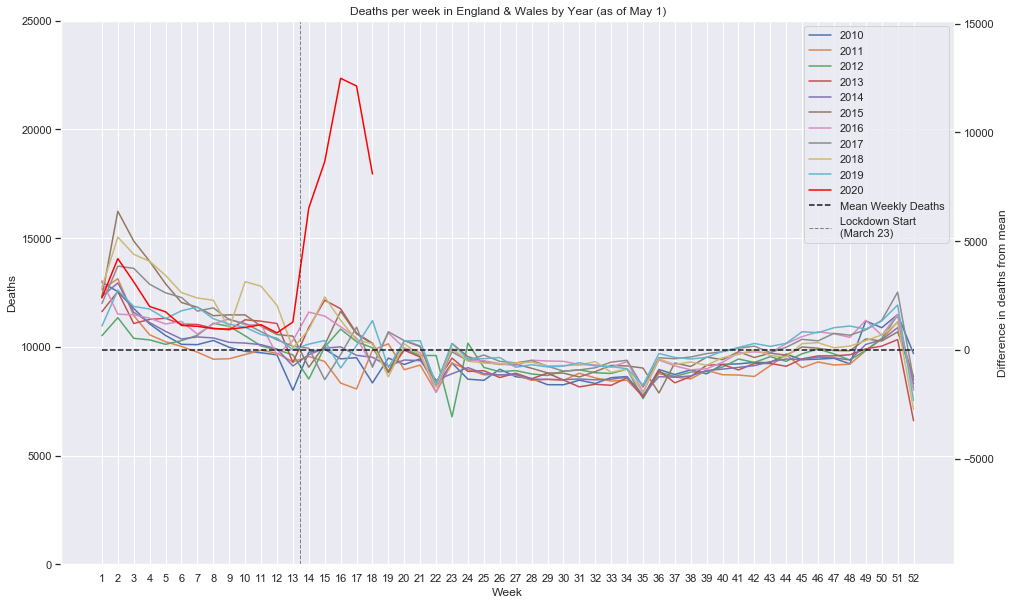

In [96]:
# set y limit to next highest multiple of 0.5 * 10^n
v_max = np.nanmax(deaths_table)
power = np.floor(np.log10(v_max))
y_max = np.ceil(v_max*2 / (10**power)) * (10**power) / 2

plot_data(deaths_table)
plt.plot([1,52],[mean,mean], "k--", label="Mean Weekly Deaths")
# lockdown start date
plt.plot([lockdown_start_week, lockdown_start_week], [0, y_max], "k--", alpha=0.5, label=f"Lockdown Start\n({lockdown_start})", linewidth=1)

plt.legend()
plt.ylim(0,y_max)
plt.title(f"Deaths per week in England & Wales by Year (as of {last_data_update})")
plt.xlabel("Week")
plt.ylabel("Deaths")

# Add the 2nd y-axis showing difference from mean
plt.twinx()
plt.ylim(-mean,y_max-mean)
plt.grid(False)
plt.ylabel("Difference in deaths from mean")

plt.savefig("Deaths.png")
plt.show()

Deaths above or below mean for that week

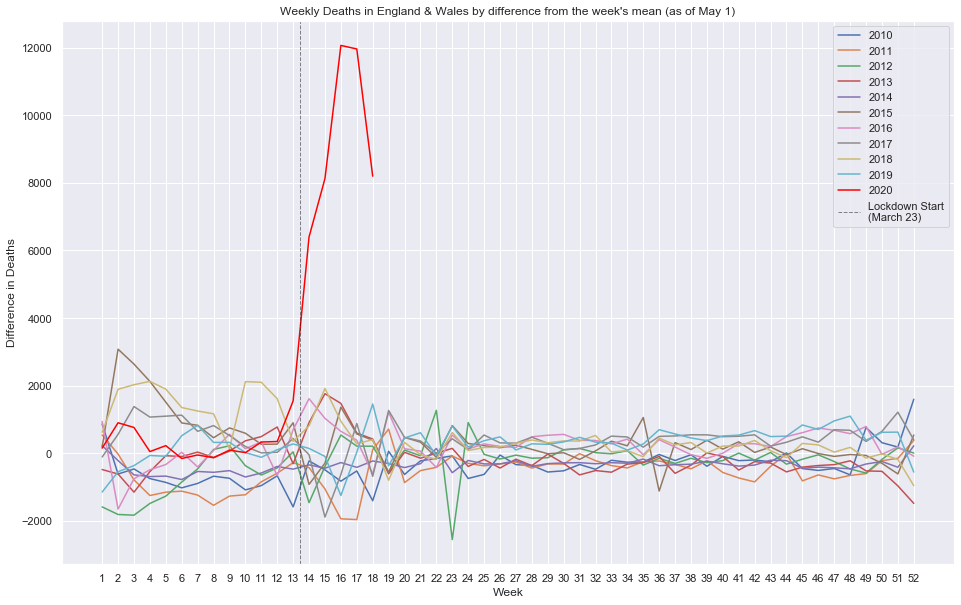

In [98]:
# means for each week (excluding 2020)
week_means = np.mean(deaths_table[:-1], 0)

week_centered_deaths = deaths_table - week_means
plot_data(week_centered_deaths)

# lockdown start date
ylim = plt.ylim()
plt.plot([lockdown_start_week, lockdown_start_week], [ylim[0], ylim[1]], "k--", alpha=0.5, label="Lockdown Start\n(March 23)", linewidth=1)
plt.ylim(ylim)

plt.legend()
plt.title(f"Weekly Deaths in England & Wales by difference from the week's mean (as of {last_data_update})")
plt.xlabel("Week")
plt.ylabel("Difference in Deaths")

plt.savefig("mean_diff_deaths.png")
plt.show()

Cumulative sum graph of deaths above mean for the week

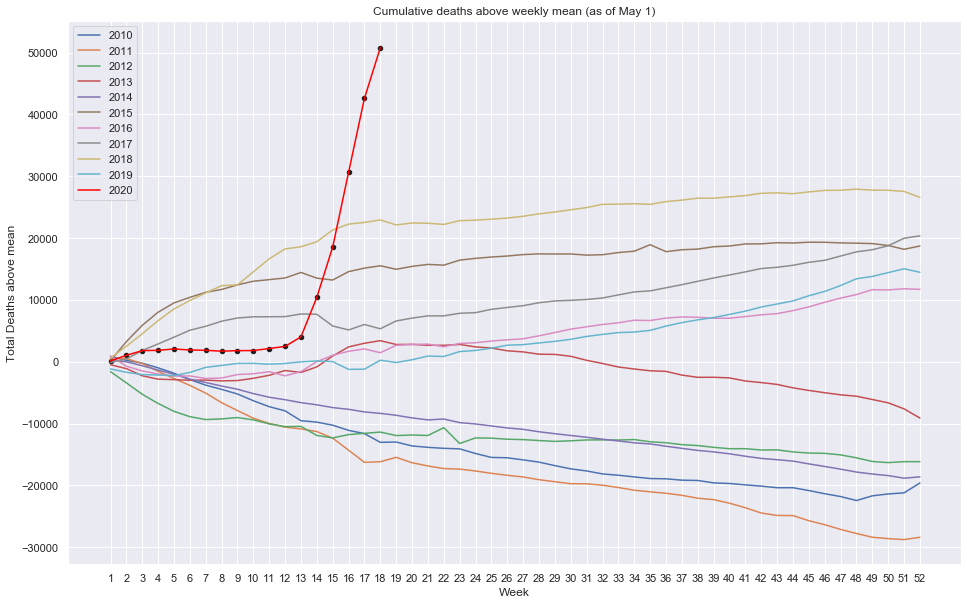

In [97]:
cum_deaths_above_mean = np.cumsum(week_centered_deaths, 1)
plot_data(cum_deaths_above_mean)
plt.legend()

plt.title(f"Cumulative deaths above weekly mean (as of {last_data_update})")
plt.scatter(range(1,53), cum_deaths_above_mean[-1], c="k", s=20)
plt.xlabel("Week")
plt.ylabel("Total Deaths above mean")
plt.savefig("cumulative_deaths.png")
plt.show()